In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the car dataset
path = r"C:\Users\Nimay\Downloads\car_data.csv"  # Replace with the actual path
car_data = pd.read_csv(path)

# Explore the dataset
car_data.head()

# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
car_data = pd.get_dummies(car_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Split the data into features and target
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [4]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.8209857844262285


In [5]:
print(f'R-squared Score: {r2}')

R-squared Score: 0.9643601062650229


In [6]:
# Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

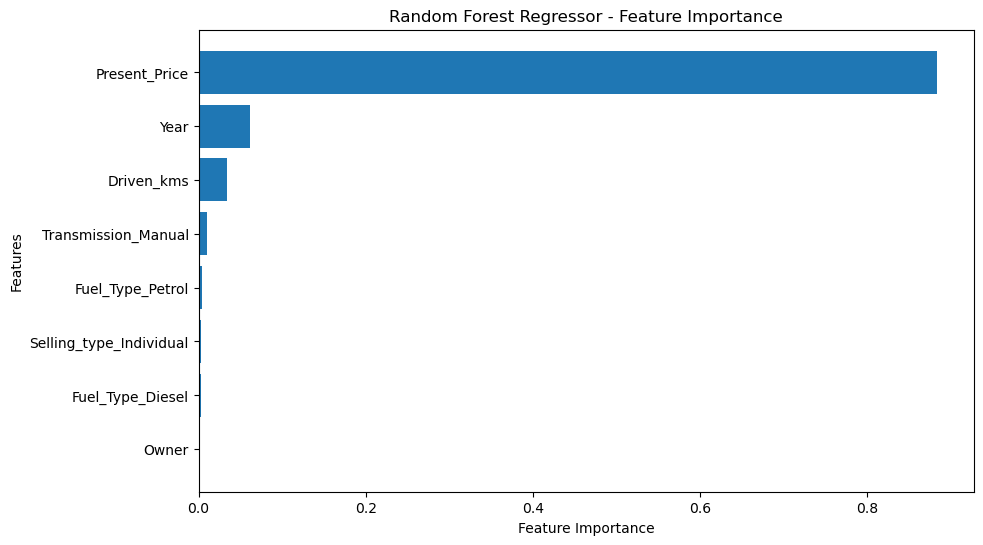

In [7]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()

In [8]:
# Import additional libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning (Random Forest Regressor)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [9]:
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Train Random Forest Regressor with the best hyperparameters
rf_model_optimized = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_optimized.fit(X_train_scaled, y_train)

# Cross-Validation
cv_scores = cross_val_score(rf_model_optimized, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print(f'Cross-Validation RMSE: {cv_rmse}')

Cross-Validation RMSE: 1.6764340545236684


In [10]:
# Feature Importance
feature_importance_optimized = rf_model_optimized.feature_importances_

# Hyperparameter Tuning (Gradient Boosting Regressor)
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_gb = grid_search_gb.best_params_

# Train Gradient Boosting Regressor with the best hyperparameters
gb_model_optimized = GradientBoostingRegressor(**best_params_gb, random_state=42)
gb_model_optimized.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model_optimized.predict(X_test_scaled)
y_pred_gb = gb_model_optimized.predict(X_test_scaled)

# Evaluate the models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [11]:
print(f'Random Forest Regressor - RMSE: {np.sqrt(mse_rf)}, R-squared: {r2_rf}')

Random Forest Regressor - RMSE: 0.9527396527392145, R-squared: 0.9605951893644329


In [12]:
print(f'Gradient Boosting Regressor - RMSE: {np.sqrt(mse_gb)}, R-squared: {r2_gb}')

Gradient Boosting Regressor - RMSE: 0.8782583581520735, R-squared: 0.9665153821912109
